In [77]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#read in data
df = pd.read_csv("results.csv") 
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
winLose = df["home_score"]-df["away_score"]

# new columns are home_win, away_win, tie
df["home_win"] = winLose[winLose > 0]
df["away_win"] = winLose[winLose < 0] 
df["tie"] = winLose[winLose == 0]

# if true, value is 1, else value is 0
df.loc[df["home_win"] > 0,"home_win"] = 1
df.loc[df["away_win"] < 0,"away_win"] = 1
df.loc[df["tie"] == 0,"tie"] = 1
df = df.fillna(0)
print(df.head(10))

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5 1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6 1877-03-03   England  Scotland           1           3   Friendly   London   
7 1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8 1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9 1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   

    country  neutral  year  month  home_win  away_win  tie  
0  Scotland    False  1872     11       0.0       0.0  1.0

In [82]:
no_month = df[['country', 'home_score', 'away_score', 'year', 'home_win', 'away_win', 'tie']]

no_month.describe()

,home_score,away_score,year,home_win,away_win,tie
count,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000
mean,1.745709,1.188105,1989.949044,0.486398,0.282671,0.230931
std,1.749145,1.405120,24.182304,0.499821,0.450303,0.421434
min,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1977.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1997.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2008.000000,1.000000,1.000000,0.000000
max,31.000000,21.000000,2019.000000,1.000000,1.000000,1.000000


count      109.000000
mean       374.669725
std       1760.569516
min          2.000000
25%         15.000000
50%         49.000000
75%        142.000000
max      16911.000000
dtype: float64

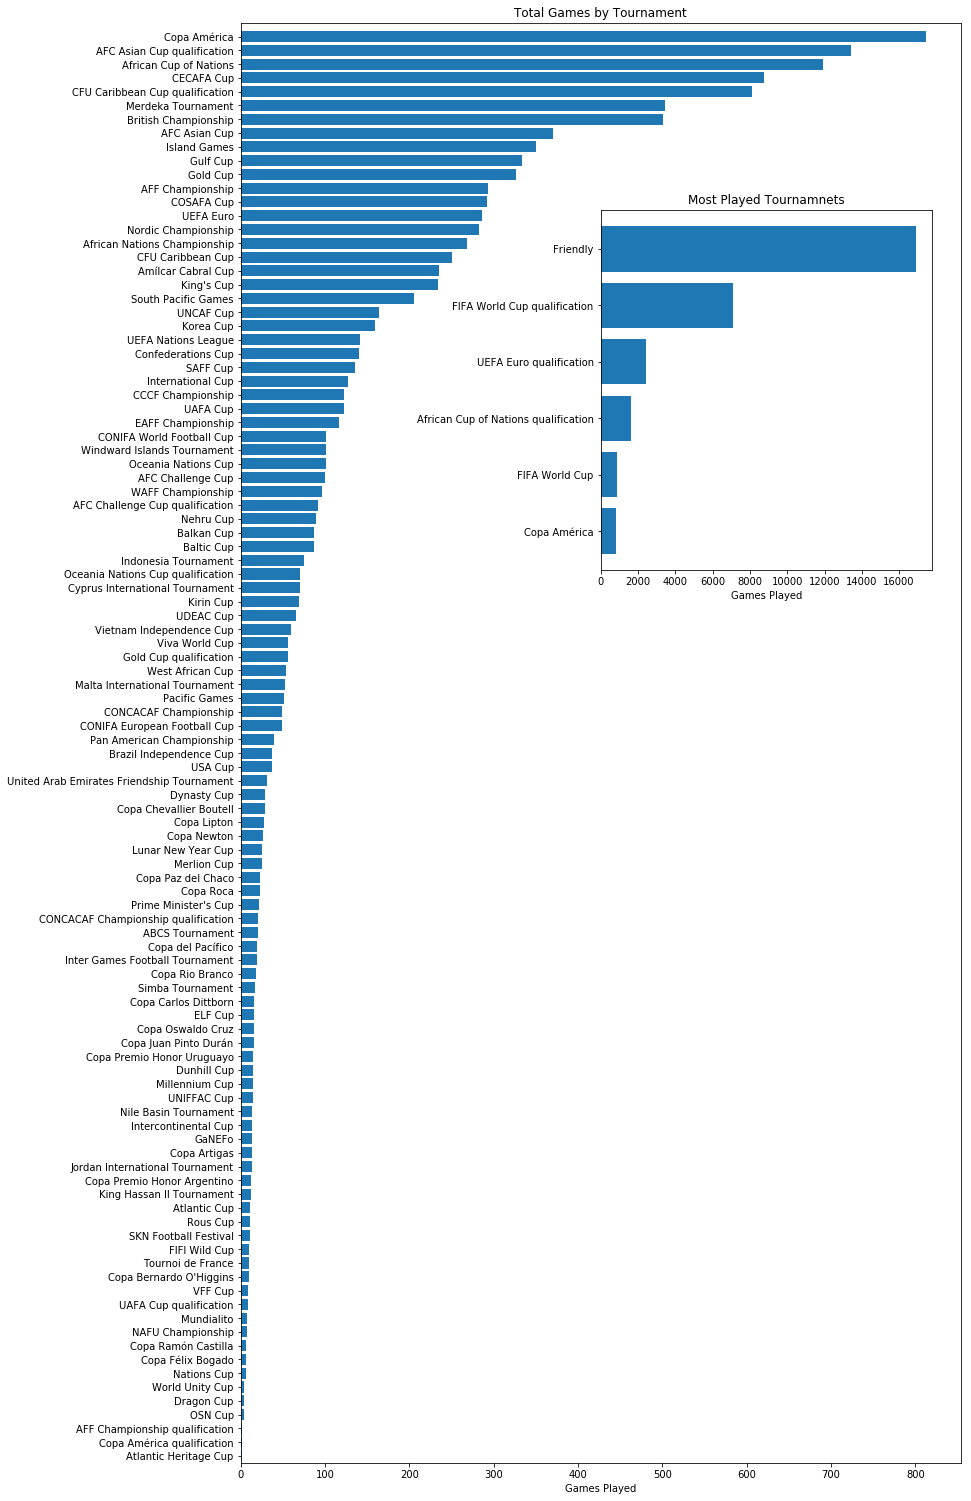

In [174]:
tournament_counts = pd.value_counts(df['tournament'].values, sort=True)

fig = plt.figure(figsize=(10,20))
ax = fig.add_axes([0.1,0.1,1,1])
in_ax = fig.add_axes([0.6,0.72,0.46,0.25])

ax.barh(tournament_counts[-1:4:-1].index, tournament_counts[-1:4:-1].values)
ax.set_ylim(-0.5,len(tournament_counts[5:]))
ax.set_title('Total Games by Tournament')
ax.set_xlabel('Games Played')
in_ax.barh(tournament_counts[5::-1].index, tournament_counts[5::-1])
in_ax.set_title('Most Played Tournamnets')
in_ax.set_xlabel('Games Played')
tournament_counts.describe()

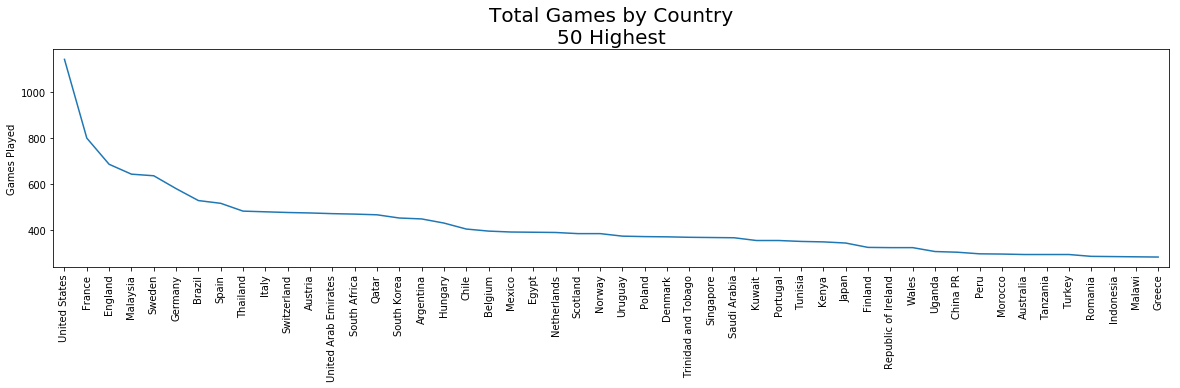

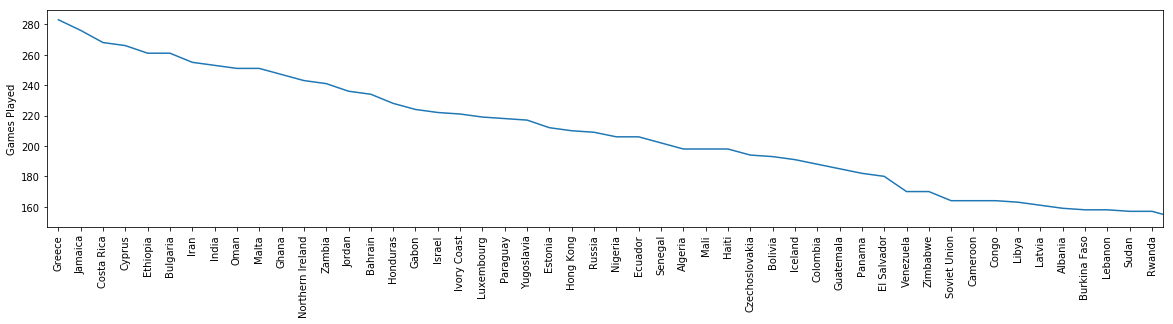

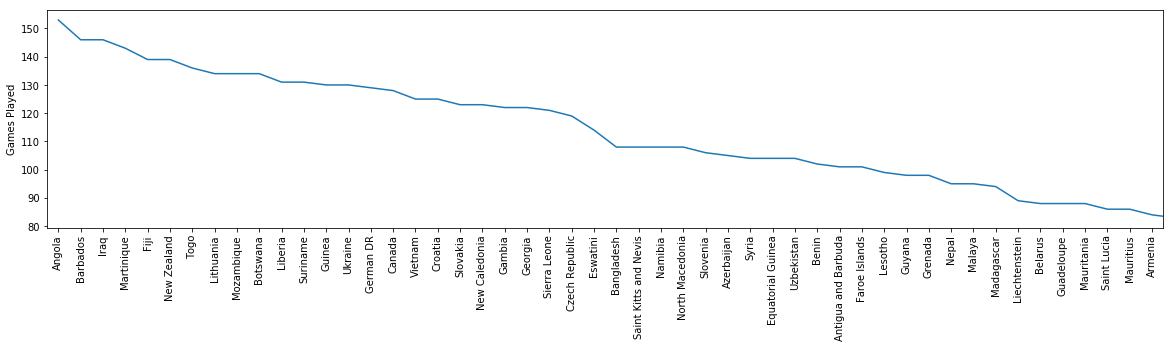

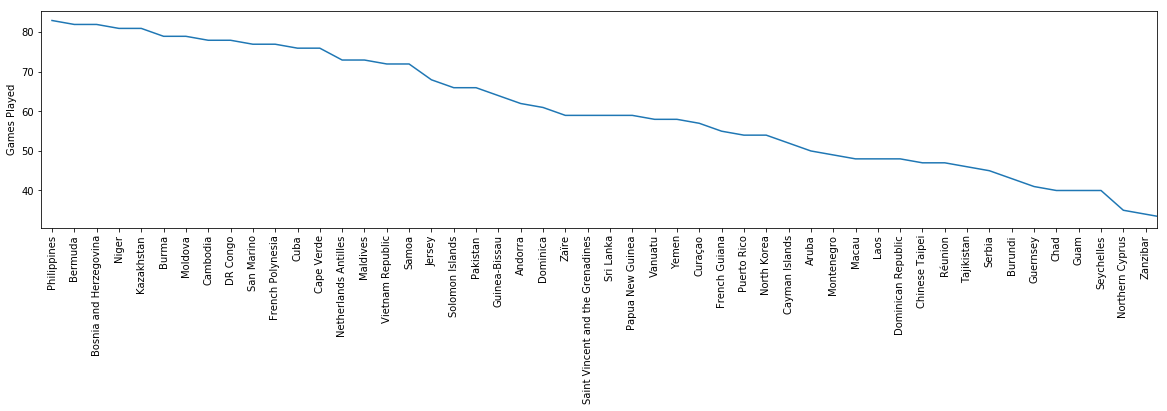

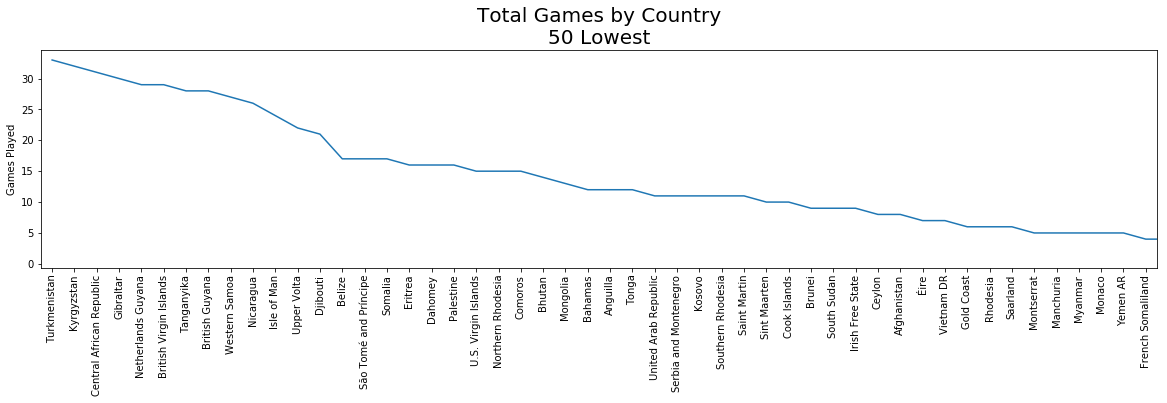

count     266.000000
mean      153.530075
std       160.946262
min         1.000000
25%        33.250000
50%       103.000000
75%       221.750000
max      1144.000000
Name: country, dtype: float64

In [162]:
country_counts = pd.value_counts(df['country'], sort=True)

plt.figure(figsize=(20,4))
plt.plot(country_counts[:50].index, country_counts[:50].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.title('Total Games by Country\n50 Highest', size=20)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[49:100].index, country_counts[49:100].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[99:150].index, country_counts[99:150].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[149:200].index, country_counts[149:200].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[199:].index, country_counts[199:].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90)
plt.title('Total Games by Country\n50 Lowest', size=20)
plt.ylabel('Games Played')
plt.show()
country_counts.describe()

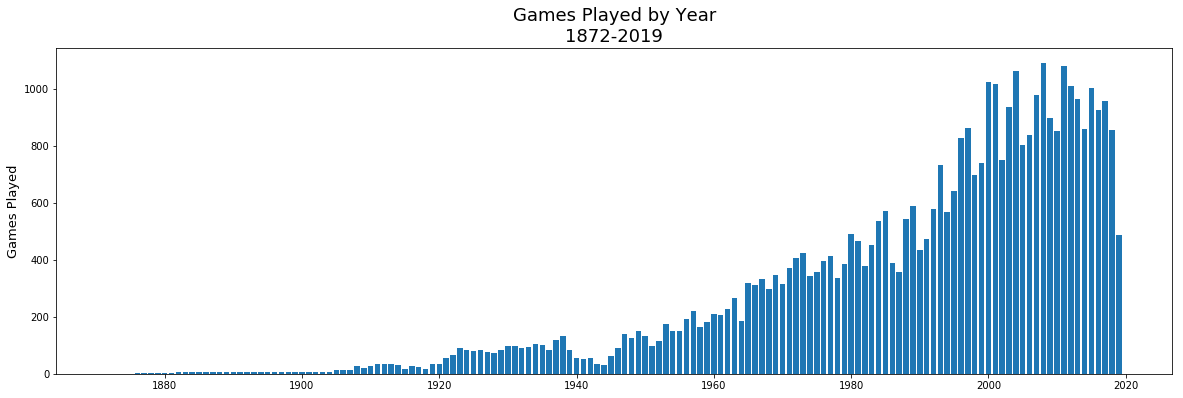

count     148.000000
mean      275.939189
std       325.421302
min         1.000000
25%        16.750000
50%       111.000000
75%       428.500000
max      1091.000000
Name: year, dtype: float64

In [173]:
games_year = pd.value_counts(df['year'])

plt.figure(figsize=(20,6))
plt.bar(games_year.index, games_year.values)
plt.title('Games Played by Year\n1872-2019', size=18)
plt.ylabel('Games Played', size=13)
plt.show()
games_year.describe()

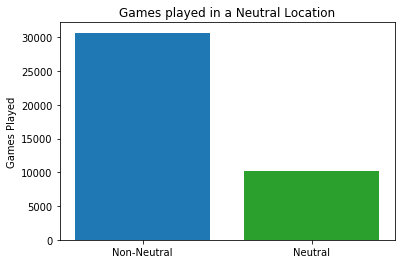

count     40839
unique        2
top       False
freq      30680
Name: neutral, dtype: object
count        2.000000
mean     20419.500000
std      14510.538257
min      10159.000000
25%      15289.250000
50%      20419.500000
75%      25549.750000
max      30680.000000
Name: neutral, dtype: float64


In [187]:
games_neutral = pd.value_counts(df['neutral'])

plt.bar(['Non-Neutral', 'Neutral'], games_neutral.values, color=['tab:blue', 'tab:green'])
plt.ylabel('Games Played')
plt.title('Games played in a Neutral Location')
plt.show()
print(df['neutral'].describe())
print(games_neutral.describe())